## Project Applied Statistics - Winter 2024 (40%)
Lecturer: Ian McLoughlin  
Author: Lais Coletta Pereira  

Project ask: Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:

**1. Download and save the dataset to your repository.**

**2. Describe the data set in your notebook.**

**3. Describe what a t-test is, how it works, and what the assumptions are.**

**4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.**

**5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.**

**6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.**


### Project Plan
Download and Save the Dataset:
Obtain and store the dataset in the repository.

Describe the Dataset:
Load the dataset, summarize its structure, and describe the variables (e.g., treatment groups).
Explain the t-test:

Define the t-test, its types (independent, paired, one-sample), assumptions (normality, independence, homogeneity of variance), and formula.
Perform t-test:

Apply an independent t-test to compare treatment groups (trt1 vs. trt2).
Report the t-statistic and p-value.
Perform ANOVA:

Apply ANOVA to compare all three groups (ctrl, trt1, trt2).
Report the F-statistic and p-value.

Justify Using ANOVA:
Explain why ANOVA is more appropriate than multiple t-tests for comparing more than two groups.


Import necessary libraries

In [50]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt



### **_1. Download and Load the Dataset_**

In [51]:
# URL of the dataset
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv"

# Load the dataset from the URL
df = pd.read_csv(url)

# Define the path to save the dataset
path = "/Users/laiscoletta/Desktop/DA_Final_Semester/Applied-Statistics/plantgrowth.csv"

# Save the dataset as plantgrowth.csv in the 'Applied-Statistics' folder
df.to_csv(path, index=False)

### **_2. Describe the data set in your notebook:_**

In [52]:
print(df.describe())

        rownames     weight
count  30.000000  30.000000
mean   15.500000   5.073000
std     8.803408   0.701192
min     1.000000   3.590000
25%     8.250000   4.550000
50%    15.500000   5.155000
75%    22.750000   5.530000
max    30.000000   6.310000


**Observations:** 
1. The weight variable shows moderate variability (std = 0.701), with weights ranging from 3.59 to 6.31 grams.
2. The median weight (5.155) is close to the mean (5.073), indicating a symmetric distribution.

In [53]:
# Dataset overview
print("\nDataset Information:")
df.info()  

# Check for missing values and report if any
missing_values = df.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values if missing_values.any() else "No missing values detected.", "\n")

# Summary for categorical variables
print("\nFrequency Distribution for 'group' (Categorical Variable):")
print(df['group'].value_counts(), "\n")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes

Missing Values in Dataset:
No missing values detected. 


Frequency Distribution for 'group' (Categorical Variable):
group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64 



In [54]:
# Dataset Description
print("\nDataset Description:")
print(f"""
The PlantGrowth dataset consists of {len(df)} observations and {df.shape[1]} columns:
1. 'weight': A numerical variable representing the weight of plants.
   - Range: {df['weight'].min()} to {df['weight'].max()} grams
   - Mean: {df['weight'].mean():.3f} grams
   - Standard Deviation: {df['weight'].std():.3f} grams
2. 'group': A categorical variable with three treatment groups:
   - Control group ('ctrl'): {df['group'].value_counts()['ctrl']} observations
   - Treatment 1 ('trt1'): {df['group'].value_counts()['trt1']} observations
   - Treatment 2 ('trt2'): {df['group'].value_counts()['trt2']} observations
""")


Dataset Description:

The PlantGrowth dataset consists of 30 observations and 3 columns:
1. 'weight': A numerical variable representing the weight of plants.
   - Range: 3.59 to 6.31 grams
   - Mean: 5.073 grams
   - Standard Deviation: 0.701 grams
2. 'group': A categorical variable with three treatment groups:
   - Control group ('ctrl'): 10 observations
   - Treatment 1 ('trt1'): 10 observations
   - Treatment 2 ('trt2'): 10 observations



### **_3. Describe what a t-test is, how it works, and what the assumptions are._**

#### What a T-test is

A **Student's t-test** is a statistical method used to determine if there is a significant difference between the means of two groups. This test is particularly useful when the sample size is small (typically less than 30) and assumes the data follows a normal distribution. It is often employed in hypothesis testing, where the test statistic follows a t-distribution. This distribution is similar to a normal distribution but has wider tails to account for the increased variability found in small samples [Source Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test).

**Types of T-Tests:**
- **One-sample t-test**: This compares the mean of a single sample to a known or hypothesized population mean. It checks whether the sample mean is significantly different from the reference value.
- **Independent (Unpaired) two-sample t-test**: This compares the means of two independent, uncorrelated groups to see if there is a significant difference.
- **Paired (Dependent) two-sample t-test**: This compares the means of two related groups, such as the same group before and after an intervention, to evaluate if the changes are statistically significant.

#### The formulas for the different types of t-test are as follows: 

**One-Sample T-test Formula**

The formula for the one-sample t-test is:

\[
t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}
\]

Where:
- \(\bar{x}\) is the sample mean,
- \(\mu_0\) is the hypothesized population mean,
- \(s\) is the sample standard deviation,
- \(n\) is the sample size.

**Independent (Unpaired) Two-Sample T-test Formula**

For independent samples, the formula is:

\[
t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
\]

Where:
- \(\bar{x_1}\) and \(\bar{x_2}\) are the sample means for groups 1 and 2,
- \(s_1^2\) and \(s_2^2\) are the sample variances,
- \(n_1\) and \(n_2\) are the sample sizes for each group.

If the sample sizes are equal, a pooled variance estimate is used:

\[
t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2} \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}
\]

**Paired Two-Sample T-test Formula**

For paired data, the formula is:

\[
t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}}
\]

Where:
- \(\bar{d}\) is the mean difference between paired observations,
- \(s_d\) is the standard deviation of the differences,
- \(n\) is the number of pairs.

#### How does a T-test work?

A T-test works by comparing the means of two groups (or a sample mean and a population mean) to see if the differences between them are statistically significant. To get to this conclusion, we must formulate hypotheses:

- **Null Hypothesis**: This assumes that the means of the two groups are equal (\(H_0: \mu_1 = \mu_2\)).
- **Alternative Hypothesis (H₁)**: This assumes that the means are different (\(H_A: \mu_1 \neq \mu_2\)).

The **significance level (\(\alpha\))** is predetermined, typically set at 0.05. This level helps in deciding whether to reject the null hypothesis or not, based on the p-value obtained from the t-test.

**One-Tailed vs Two-Tailed T-Test**

The t-test can be either one-tailed or two-tailed:
- A **one-tailed test** is used if there is a specific direction in the hypothesis (e.g., "greater than" or "less than").
- A **two-tailed test** is used if the hypothesis only asks whether there is a difference, without specifying the direction.

**Making a Decision**

After calculating the t-statistic and the p-value, the decision is made whether to reject the null hypothesis:
- If \( p \leq \alpha \), reject the null hypothesis and conclude that there is a significant difference between the groups.
- If \( p > \alpha \), fail to reject the null hypothesis, indicating no significant difference.

#### Assumptions of a T-test

Before performing a t-test, several assumptions must be met:
1. **Continuous Data**: The data should be continuous, allowing for accurate mean and standard deviation calculations.
2. **Random Sampling**: Data should be gathered randomly (one-sample t-test) or from independent (for two-sample tests) or paired (for dependent tests) groups.
3. **Normal Distribution**: The data for each group should be normally distributed.
4. **Homogeneity of Variances**: Variances in both groups should be similar.

**Continuous Data**

Continuous data represents values that can take any number within a certain range. This type of data is essential for the t-test because the mean and standard deviation need to be computed precisely. Continuous data should follow a normal distribution, which can be tested using histograms, box plots, or Q-Q plots.

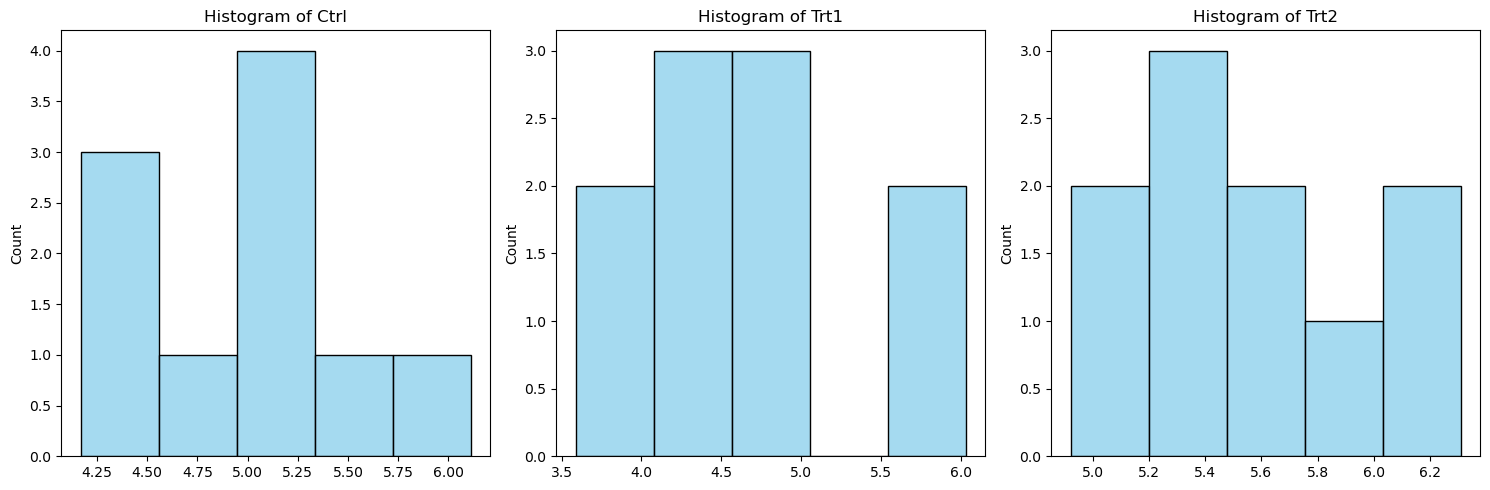

In [55]:
#Histogram:
# Group data by treatment type and store in separate variables
df_grouped = df.groupby('group')['weight'].apply(list)

# Create histograms for each treatment group with the same color
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, group in enumerate(['ctrl', 'trt1', 'trt2']):
    sns.histplot(df_grouped[group], bins=5, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram of {group.capitalize()}')

plt.tight_layout()
plt.show()


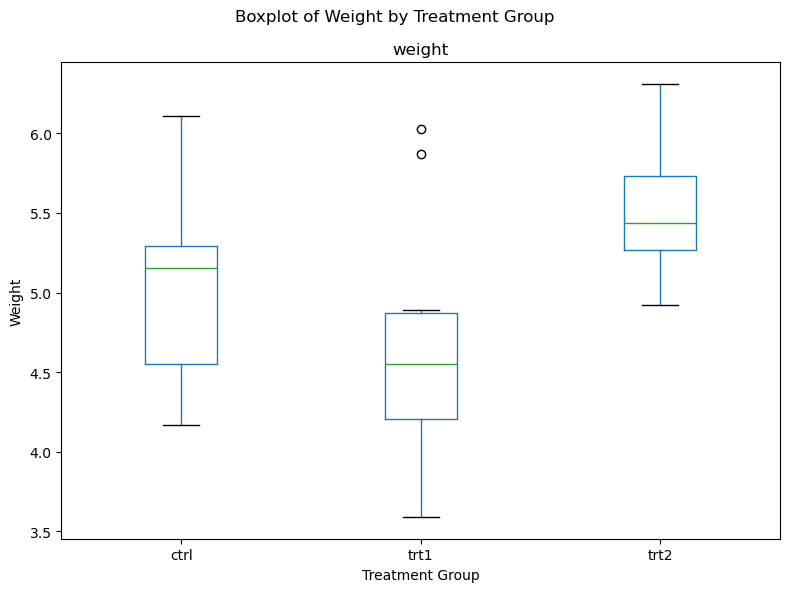

In [56]:
# Boxplot of treatment groups
df.boxplot(column='weight', by='group', figsize=(8, 6), grid = False)

# Add labels and title
plt.xlabel('Treatment Group')
plt.ylabel('Weight')
plt.suptitle('Boxplot of Weight by Treatment Group')  # Title for the entire plot
plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()

### **4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.**

In [57]:
import pandas as pd
from scipy import stats

# Load the PlantGrowth dataset
df = pd.read_csv('PlantGrowth.csv')

# Separate the data into two groups: 'ctrl' (control) and 'trt1' (Treatment 1)
group_ctrl = df[df['group'] == 'ctrl']['weight']
group_trt1 = df[df['group'] == 'trt1']['weight']

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(group_ctrl, group_trt1)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There is a significant difference between the control group and Treatment 1 group.")
else:
    print("There is no significant difference between the control group and Treatment 1 group.")

T-statistic: 1.1912603818487009
P-value: 0.2490231659730067
There is no significant difference between the control group and Treatment 1 group.


Marking Scheme
Each component will be graded based on the following four categories. Each category carries equal weight.

Remember, your repository is what will be evaluated. It should demonstrate evidence of the criteria outlined for each category. That said, the examiners' overall impression of the submission may affect marks in each category.

You are expected to make steady progress on the assessment throughout the semester. This should be reflected in your commit history. Huge commits, especially late in the semester, will not be accepted. At any stage you may be asked to discuss the work to date in your repository.

If you encounter issues with your repository, seek help well before the deadline. Do not delete any files or commits without first consulting the lecturer.

Research
Evidence of research on relevant topics.
Appropriate referencing.
Building upon the literature and documentation.
Comparisons to similar work.
Development
Clear, concise, and correct code.
Appropriate tests.
Knowledge of different approaches and algorithms.
Clean architecture.
Documentation
Clear explanations of concepts.
Concise comments in code and elsewhere.
Appropriate README for repository.
Consistency
Tens of commits, each representing a reasonable amount of work.
Literature, documentation, and code evidencing work on the assessment.
Evidence of reviewing and refactoring.
Advice
The freedom provided in open-style assessments such as this one can feel challenging. You need to decide how to start, what content to include, how much to cover, and how to make the work your own.

The assessment is designed to provide you with opportunities for independent thinking and decision-making. Employers value graduates who can take initiative, work independently, and make design decisions with minimal guidance. We expect you to have basic programming knowledge and be able to find information on your own.

You should have a clear plan before you start coding. Your submission should include both your plan and an explanation of any design choices you made.

Make sure to follow ATU's policies and regulations which are on the Student Hub. Pay particular attention to any policies on plagiarism and the Student Code. If you're unsure about anything, ask the lecturer.

1. Download and Load the Dataset

2. Describe the Dataset

3. What is a t-test?
A t-test is a statistical test used to determine whether there is a significant difference between the means of two groups. There are two main types of t-tests:

Independent samples t-test: Compares means of two independent groups.
Paired samples t-test: Compares means from the same group at two different times.
How It Works
Computes the t-statistic, which measures the difference between group means relative to the variation in the data.
Compares the t-statistic to a critical value from the t-distribution to decide whether the difference is statistically significant.
Assumptions
The data is continuous.
The data follows a normal distribution (or the sample size is large enough for the Central Limit Theorem to apply).
The two groups have approximately equal variances.
Observations are independent.
4. Performing t-test on trt1 and trt2
We will check if there is a significant difference in plant weights between trt1 and trt2.

5. What is ANOVA?
Analysis of Variance (ANOVA) is used to determine whether there are statistically significant differences between the means of three or more groups.

How It Works
Partition total variation in the data into "between-group" and "within-group" variances.
Calculates the F-statistic, which is the ratio of between-group variance to within-group variance.
Compares the F-statistic to a critical value from the F-distribution.
Assumptions
The data follows a normal distribution.
Homogeneity of variances across groups.
Observations are independent.
6. Why Use ANOVA Instead of Multiple t-tests?
Increased Error Rate: Conducting multiple t-tests increases the likelihood of Type I errors (false positives) because each test has its own significance threshold.
Holistic Approach: ANOVA considers all group comparisons simultaneously, providing a single test statistic.
Efficiency: ANOVA is computationally more efficient and interprets overall group differences in one step.
7. Performing ANOVA
We will determine if there is a significant difference in plant weights between the three groups: ctrl, trt1, and trt2.

**References**
T-Tests Overview:
"T-Tests Overview" from Statistics How To: https://www.statisticshowto.com/probability-and-statistics/t-test/

Understanding the t-distribution:
"T-Distribution and T-Test" from Investopedia: https://www.investopedia.com/terms/t/t-distribution.asp

SciPy Documentation on T-Test:
SciPy Documentation (n.d.). t-test: scipy.stats.ttest_ind: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

The Assumptions of the t-test:
"Assumptions of a t-test" from Simply Psychology: https://www.simplypsychology.org/t-test.html

Python for Data Science:
"Python Data Science Handbook" by Jake VanderPlas (O'Reilly): https://jakevdp.github.io/PythonDataScienceHandbook/

Thevapalan, S. (2024). "T-Test Explained." The Research Journal.
Wikipedia "Hypothesis Testing." https://en.wikipedia.org/wiki/Statistical_hypothesis_test
GraphPad Software. (n.d.). "T-test Tutorial." Link
Independent Two-Sample T-test Quora Discussion (https://www.quora.com/What-distinguishes-between-the-single-sample-t-test-and-the-independent-samplest-test-in-terms-of-the-comparison-distribution)